In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [3]:
data=pd.read_csv('/content/drive/MyDrive/vaccinations_us.csv')
data_presentation=pd.read_csv('/content/drive/MyDrive/vaccinations_us.csv',parse_dates=True,index_col='date')

In [4]:
data['date']=pd.to_datetime(data['date'])

In [ ]:
# # data=pd.read_csv('/content/drive/MyDrive/FEDFUNDS.csv')
# # data_presentation=pd.read_csv('/content/drive/MyDrive/FEDFUNDS.csv',parse_dates=True,index_col="DATE")
# data=pd.read_excel("/content/drive/MyDrive/Groceries_Sales_data.xlsx",parse_dates=[0])
# data_presentation=pd.read_excel("/content/drive/MyDrive/Groceries_Sales_data.xlsx",parse_dates=True,index_col='Date')

In [5]:
data_presetation=data_presentation.drop(['location','vaccine','source_url','total_vaccinations','people_fully_vaccinated'],inplace=True,axis=1)

In [6]:
data_presentation.index

DatetimeIndex(['2020-12-20', '2020-12-21', '2020-12-23', '2020-12-26',
               '2020-12-28', '2020-12-30', '2021-01-02', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14',
               '2021-01-15', '2021-01-19', '2021-01-20', '2021-01-21',
               '2021-01-22', '2021-01-23', '2021-01-24', '2021-01-25',
               '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29',
               '2021-01-30', '2021-01-31', '2021-02-01', '2021-02-02',
               '2021-02-03', '2021-02-04', '2021-02-05', '2021-02-06',
               '2021-02-07', '2021-02-08', '2021-02-09', '2021-02-10',
               '2021-02-11', '2021-02-12', '2021-02-13', '2021-02-14',
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-20', '2021-02-21', '2021-02-22', '2021-02-23',
               '2021-02-24', '2021-02-25', '2021-02-26', '2021-02-27',
      

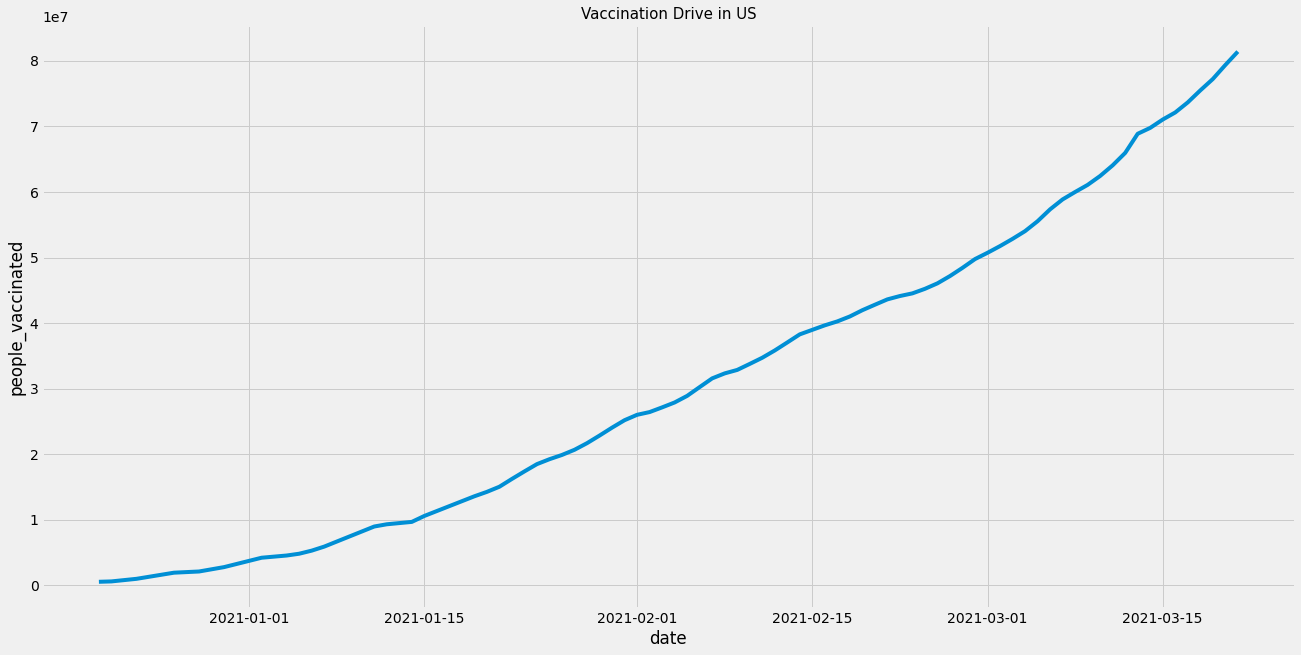

In [7]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(20,10))
a=sns.lineplot(x='date',y="people_vaccinated",data=data)
a.set_title("Vaccination Drive in US",fontsize=15)
plt.show()

In [8]:
data_true=data[['date','people_vaccinated']]

In [9]:
data_true

,date,people_vaccinated
0,2020-12-20,556208.0
1,2020-12-21,614117.0
2,2020-12-23,1008025.0
3,2020-12-26,1944585.0
4,2020-12-28,2127143.0
...,...,...
73,2021-03-17,73669956.0
74,2021-03-18,75495716.0
75,2021-03-19,77230061.0
76,2021-03-20,79367225.0


In [10]:
data_presentation.isnull().sum()

people_vaccinated    1
dtype: int64

In [11]:
data_presentation=data_presentation.dropna()

In [12]:
data_presentation.isnull().sum()

people_vaccinated    0
dtype: int64

In [13]:
data_true.columns=['ds','y']

In [14]:
data_true.tail(12)

,ds,y
66,2021-03-10,62451150.0
67,2021-03-11,64071674.0
68,2021-03-12,65965305.0
69,2021-03-13,68884011.0
70,2021-03-14,69784210.0
71,2021-03-15,71054445.0
72,2021-03-16,72135616.0
73,2021-03-17,73669956.0
74,2021-03-18,75495716.0
75,2021-03-19,77230061.0


In [15]:
train=40
test=data_true.shape[0]-train
df_train=data_true.head(train)
df_test=data_true.tail(test)

In [16]:
print(df_train.shape, df_test.shape)

(40, 2) (38, 2)


In [17]:
df_train

,ds,y
0,2020-12-20,556208.0
1,2020-12-21,614117.0
2,2020-12-23,1008025.0
3,2020-12-26,1944585.0
4,2020-12-28,2127143.0
5,2020-12-30,2794588.0
6,2021-01-02,4225756.0
7,2021-01-04,4563260.0
8,2021-01-05,4836469.0
9,2021-01-06,5306797.0


In [18]:
df_test

,ds,y
40,2021-02-11,34723964.0
41,2021-02-12,35834855.0
42,2021-02-13,37056122.0
43,2021-02-14,38292270.0
44,2021-02-16,39670551.0
45,2021-02-17,40268009.0
46,2021-02-18,41021049.0
47,2021-02-19,41977401.0
48,2021-02-20,42809595.0
49,2021-02-21,43628092.0


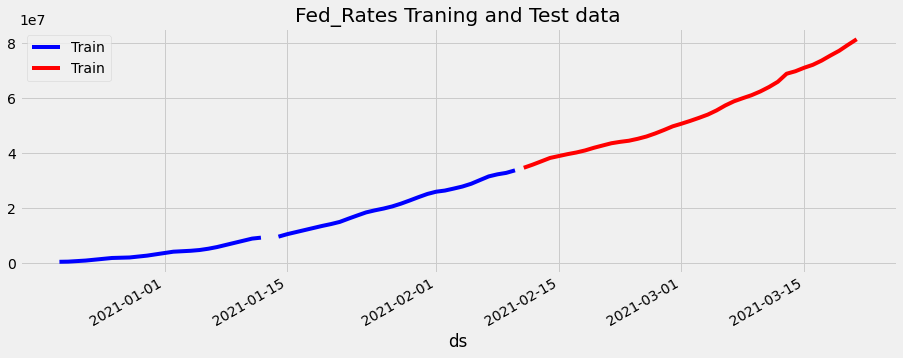

In [19]:
f, ax = plt.subplots(figsize=(14,5))
df_train.plot(kind='line', x='ds', y='y', color='blue', label='Train', ax=ax)
df_test.plot(kind='line', x='ds', y='y', color='red', label='Train', ax=ax)
plt.title('Fed_Rates Traning and Test data')
plt.show()

In [20]:
prophet=Prophet(growth="linear")
prophet.fit(df_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
future = prophet.make_future_dataframe(periods=12, freq='W')
forecast = prophet.predict(future)

In [22]:
future

,ds
0,2020-12-20
1,2020-12-21
2,2020-12-23
3,2020-12-26
4,2020-12-28
5,2020-12-30
6,2021-01-02
7,2021-01-04
8,2021-01-05
9,2021-01-06


In [23]:
forecast_1=prophet.predict(future)

In [24]:
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-20,2.059437e+05,4.366615e+05,7.940021e+05,2.059437e+05,2.059437e+05,406790.261890,406790.261890,406790.261890,406790.261890,406790.261890,406790.261890,0.0,0.0,0.0,6.127339e+05
1,2020-12-21,4.546265e+05,4.643898e+05,8.261856e+05,4.546265e+05,4.546265e+05,186988.854447,186988.854447,186988.854447,186988.854447,186988.854447,186988.854447,0.0,0.0,0.0,6.416153e+05
2,2020-12-23,9.519920e+05,6.068999e+05,9.598591e+05,9.519920e+05,9.519920e+05,-175233.071111,-175233.071111,-175233.071111,-175233.071111,-175233.071111,-175233.071111,0.0,0.0,0.0,7.767590e+05
3,2020-12-26,1.698040e+06,1.725861e+06,2.074661e+06,1.698040e+06,1.698040e+06,201578.089618,201578.089618,201578.089618,201578.089618,201578.089618,201578.089618,0.0,0.0,0.0,1.899618e+06
4,2020-12-28,2.195406e+06,2.197532e+06,2.552232e+06,2.195406e+06,2.195406e+06,186988.854447,186988.854447,186988.854447,186988.854447,186988.854447,186988.854447,0.0,0.0,0.0,2.382395e+06
5,2020-12-30,2.890557e+06,2.529242e+06,2.896698e+06,2.890557e+06,2.890557e+06,-175233.071111,-175233.071111,-175233.071111,-175233.071111,-175233.071111,-175233.071111,0.0,0.0,0.0,2.715324e+06
6,2021-01-02,3.933354e+06,3.948585e+06,4.311153e+06,3.933354e+06,3.933354e+06,201578.089618,201578.089618,201578.089618,201578.089618,201578.089618,201578.089618,0.0,0.0,0.0,4.134932e+06
7,2021-01-04,4.628864e+06,4.634314e+06,4.994545e+06,4.628864e+06,4.628864e+06,186988.854447,186988.854447,186988.854447,186988.854447,186988.854447,186988.854447,0.0,0.0,0.0,4.815853e+06
8,2021-01-05,4.977458e+06,4.754198e+06,5.097429e+06,4.977458e+06,4.977458e+06,-46493.718927,-46493.718927,-46493.718927,-46493.718927,-46493.718927,-46493.718927,0.0,0.0,0.0,4.930965e+06
9,2021-01-06,5.572101e+06,5.209880e+06,5.585561e+06,5.572101e+06,5.572101e+06,-175233.071110,-175233.071110,-175233.071110,-175233.071110,-175233.071110,-175233.071110,0.0,0.0,0.0,5.396868e+06


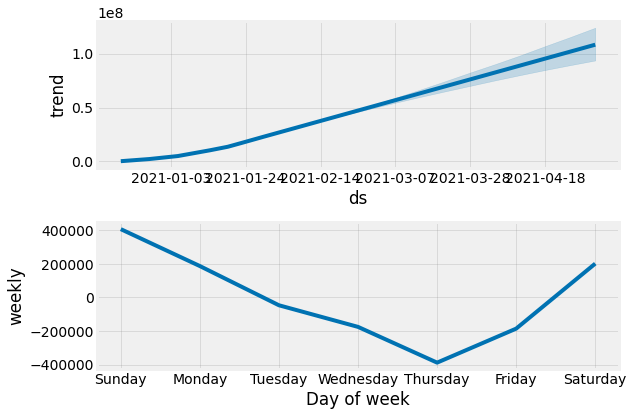

In [25]:
fig = prophet.plot_components(forecast_1)


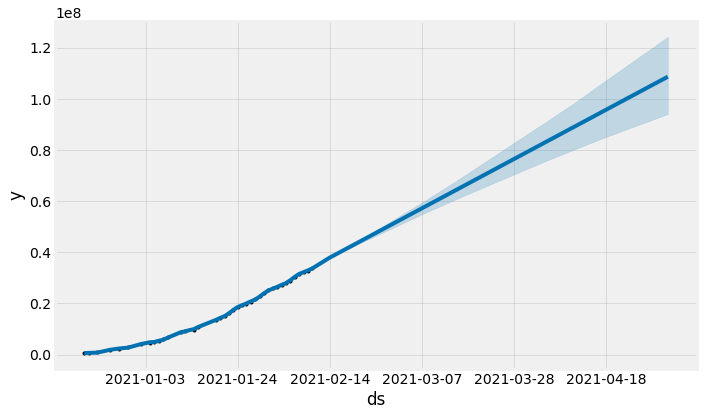

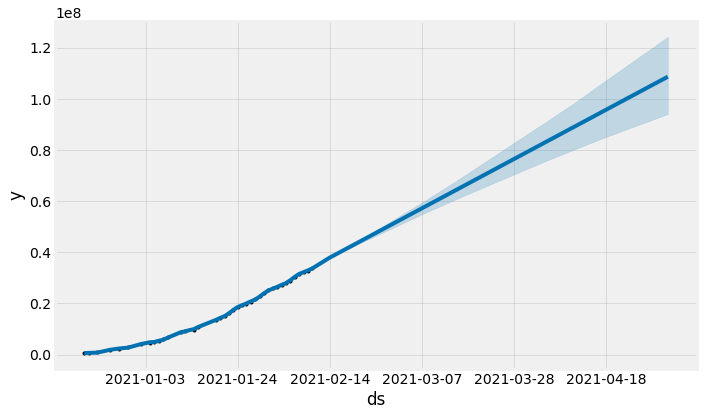

In [26]:
prophet.plot(forecast_1)

In [27]:
X_tst_forecast = prophet.predict(df_test)

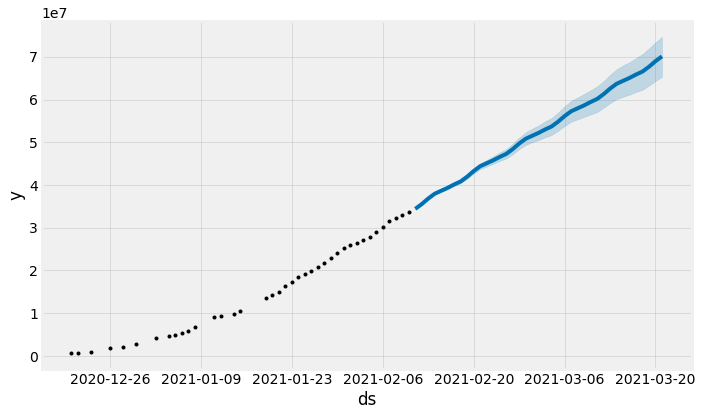

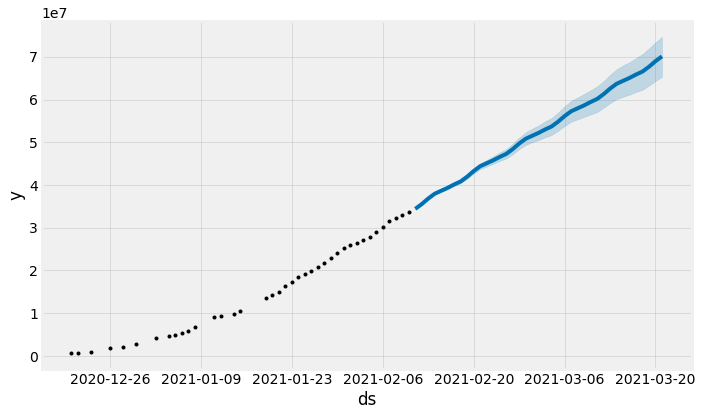

In [28]:
prophet.plot(X_tst_forecast)

In [29]:
import numpy as np
def MAEP(y_true,y_pred):
  y_tru,y_pred=np.array(y_true),np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [1]:
# from sklearn.metrics import mean_absolute_error
# # calculate MAE between expected and predicted values for december
# y_true = data['y'][-12:].values
# y_pred = forecast['yhat'].values
# mae = MAEP(y_true, y_pred)
# print('MAE: %.3f' % mae)

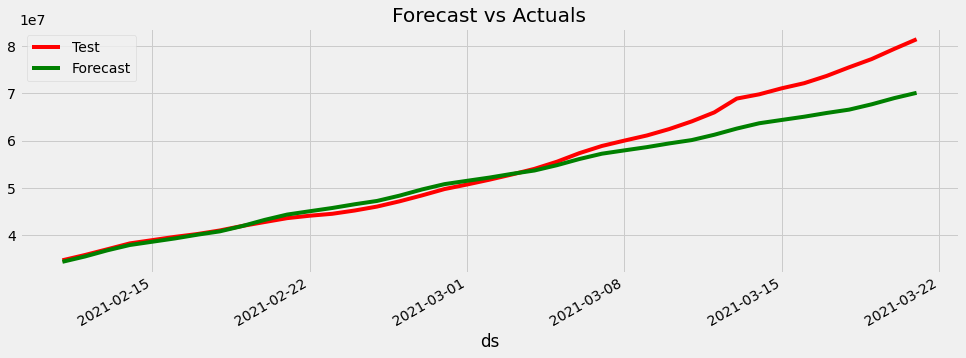

In [30]:
# import matplotlib.pyplot as plt

# plt.plot(y_true, label='Actual')
# plt.plot(X_tst_forecast, label='Predicted')
# plt.legend()
# plt.show()

f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
df_test.plot(kind='line',x='ds', y='y', color='red', label='Test', ax=ax)
X_tst_forecast.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Forecast vs Actuals')
plt.show()

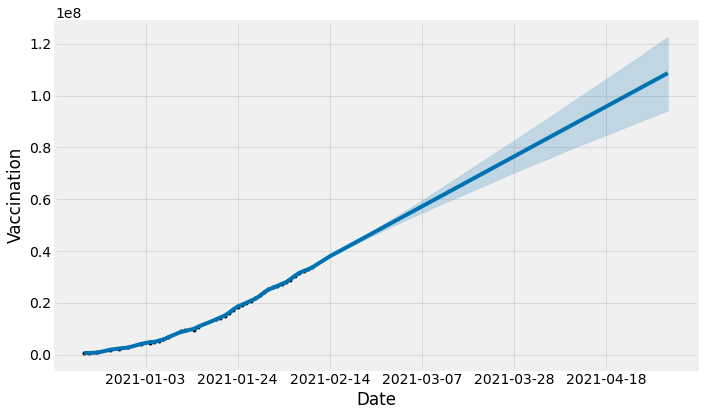

In [31]:
figure=prophet.plot(forecast,xlabel="Date",ylabel="Vaccination")

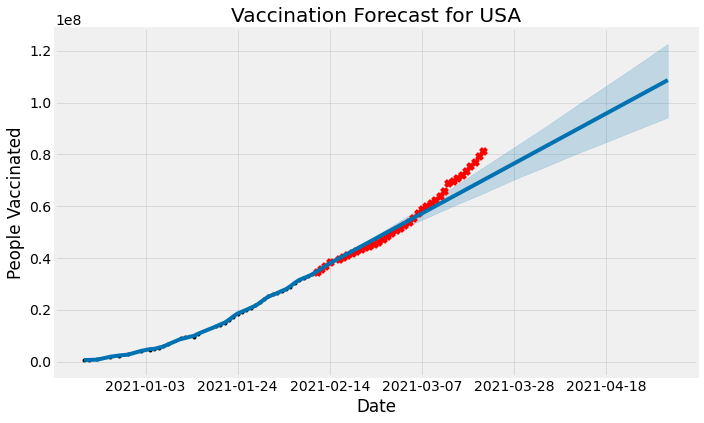

In [32]:

import matplotlib.dates as mdates
monthyearFmt = mdates.DateFormatter('%B %Y')
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)

fig = prophet.plot(forecast, xlabel='Date', ylabel='People Vaccinated')
ax = fig.gca()
ax.scatter(df_test['ds'], df_test['y'], color='r', label='Actual data', marker='x')
ax.title.set_text('Vaccination Forecast for USA')
plt.show()